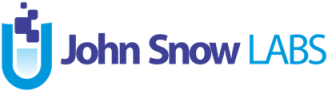

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlptest/blob/main/demo/tutorials/end-to-end-notebooks/HuggingFace_Dataset_Notebook.ipynb)

**nlptest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with nlptest on John Snow Labs

In [1]:
!pip install nlptest==1.5rc2


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/59.7 MB ? eta -:--:--
     ---------------------------------------- 0.2/59.7 MB 3.1 MB/s eta 0:00:20
     ---------------------------------------- 0.4/59.7 MB 4.1 MB/s eta 0:00:15
     ---------------------------------------- 0.7/59.7 MB 4.8 MB/s eta 0:00:13
      --------------------------------------- 1.0/59.7 MB 4.6 MB/s eta 0:00:13
      --------------------------------------- 1.0/59.7 MB 4.4 MB/s eta 0:00:14
      --------------------------------------- 1.0/59.7 MB 4.4 MB/s eta 0:00:14
     - -------------------------------------- 1.6/59.7 MB 4.2 MB/s eta 0:00:14
     - -------------------------------------- 1.8/59.7 MB 4.0 MB/s eta 0:00:15
     - -------------------------------------- 2.1/59.7 MB 4.2 MB/s eta 0:00:14
     - -------------------------------------- 2.1/59.7 MB 4.2 MB/s eta 0:00:14
     - -------------------------------------- 2.3/59.7 MB 3.5 MB/s eta 0:00:17
     - -------------------------------------- 2.8/59.7 MB 4

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the nlptest library in the following way.

In [2]:
#Import Harness from the nlptest library
from nlptest import Harness

# Augmentation

In this section, we dive into testing of augmentation on the datasets with Models.

### Setup and Configure Harness

In [ ]:
# Load train CoNLL
!wget https://github.com/JohnSnowLabs/nlptest/raw/main/demo/data/conll03.conll

# Load test CoNLL
!wget https://raw.githubusercontent.com/JohnSnowLabs/nlptest/main/nlptest/data/conll/sample.conll

In [3]:
harness = Harness(task="ner", hub="huggingface",
                   model="dslim/bert-base-NER"
                  )

We have specified task as `ner` , hub as `huggingface` and model as `dslim/bert-base-NER`

Currently, we support the augmentation for ner task with conll datasets only.


For tests we used lowercase and uppercase. Other available robustness tests are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`

Bias tests:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`


In [5]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'lowercase': {'min_pass_rate': 0.66},
                          'uppercase': {'min_pass_rate': 0.66},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'lowercase': {'min_pass_rate': 0.66},
   'uppercase': {'min_pass_rate': 0.66}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

In [6]:
# Limit the data to the first 2000 samples
harness.data = harness.data[:30]

### Generating the test cases.

In [7]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 997.93it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [8]:
harness.testcases()

,category,test_type,original,test_case,expected_result
0,robustness,lowercase,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","soccer - japan get lucky win , china in surpri...","JAPAN: MISC, LUCKY: PER, CHINA: ORG"
1,robustness,lowercase,Nadim Ladki,nadim ladki,Nadim Ladki: PER
2,robustness,lowercase,"AL-AIN , United Arab Emirates 1996-12-06","al-ain , united arab emirates 1996-12-06","AL-AIN: LOC, United Arab Emirates: LOC"
3,robustness,lowercase,Japan began the defence of their Asian Cup tit...,japan began the defence of their asian cup tit...,"Japan: LOC, Asian Cup: MISC, Syria: LOC, Group..."
4,robustness,lowercase,But China saw their luck desert them in the se...,but china saw their luck desert them in the se...,"China: LOC, Uzbekistan: LOC"
5,robustness,lowercase,China controlled most of the match and saw sev...,china controlled most of the match and saw sev...,"China: LOC, Uzbek: MISC, Igor Shkvyrin: PER, C..."
6,robustness,lowercase,Oleg Shatskiku made sure of the win in injury ...,oleg shatskiku made sure of the win in injury ...,Oleg Shatskiku: PER
7,robustness,lowercase,The former Soviet republic was playing in an A...,the former soviet republic was playing in an a...,"Soviet: MISC, Asian Cup: MISC"
8,robustness,lowercase,Despite winning the Asian Games title two year...,despite winning the asian games title two year...,"Asian Games: MISC, Uzbekistan: LOC"
9,robustness,lowercase,Two goals from defensive errors in the last si...,two goals from defensive errors in the last si...,"Japan: LOC, Syria: LOC"


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [9]:
harness.run()

Running testcases... : 100%|██████████| 60/60 [00:20<00:00,  2.95it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [10]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,lowercase,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","soccer - japan get lucky win , china in surpri...","JAPAN: MISC, LUCKY: PER, CHINA: ORG",,False
1,robustness,lowercase,Nadim Ladki,nadim ladki,Nadim Ladki: PER,,False
2,robustness,lowercase,"AL-AIN , United Arab Emirates 1996-12-06","al-ain , united arab emirates 1996-12-06","AL-AIN: LOC, United Arab Emirates: LOC",al-ain: LOC,False
3,robustness,lowercase,Japan began the defence of their Asian Cup tit...,japan began the defence of their asian cup tit...,"Japan: LOC, Asian Cup: MISC, Syria: LOC, Group...","japan: ORG, syria: ORG",False
4,robustness,lowercase,But China saw their luck desert them in the se...,but china saw their luck desert them in the se...,"China: LOC, Uzbekistan: LOC",uzbekistan: LOC,False
5,robustness,lowercase,China controlled most of the match and saw sev...,china controlled most of the match and saw sev...,"China: LOC, Uzbek: MISC, Igor Shkvyrin: PER, C...","uzbek: MISC, igor shkvyrin: PER",False
6,robustness,lowercase,Oleg Shatskiku made sure of the win in injury ...,oleg shatskiku made sure of the win in injury ...,Oleg Shatskiku: PER,,False
7,robustness,lowercase,The former Soviet republic was playing in an A...,the former soviet republic was playing in an a...,"Soviet: MISC, Asian Cup: MISC",,False
8,robustness,lowercase,Despite winning the Asian Games title two year...,despite winning the asian games title two year...,"Asian Games: MISC, Uzbekistan: LOC",uzbekistan: LOC,False
9,robustness,lowercase,Two goals from defensive errors in the last si...,two goals from defensive errors in the last si...,"Japan: LOC, Syria: LOC","japan: ORG, syria: ORG",False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [11]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,27,3,10%,66%,False
1,robustness,uppercase,23,7,23%,66%,False


### Augmentation with custom proportions

custom_proportions is a dictionary with augmentation on test type as key and proportion as value. The proportion is the percentage of the test cases that will be augmented with the given augmentation type.

**Augumentation with custom proportions in Dict format**

custom_proportions is a dictionary with augmentation on test type as key and proportion as value. The proportion is the percentage of the test cases that will be augmented with the given augmentation type.

```
custom_proportions = {'uppercase': 0.5, 'lowercase': 0.5}
```

**Augumentation with custom proportions in List format**

custom_proportions is a list of test types. 
```
custom_proportions = ['uppercase', 'lowercase']
```

In [14]:
custom_proportations = {
    'uppercase':0.3,
    'lowercase':0.3
}
harness.augment("conll03.conll",'augmented_conll03.conll', custom_proportations, inplace=False)

if you want to make augmentation within in dataset, use `inplace=True` parameter.


In [15]:
harness.augment("conll03.conll",'augmented_conll03.conll',custom_proportations, inplace=True)

In [16]:
custom_proportations = ['uppercase', 'lowercase']
harness.augment("conll03.conll",'augmented_conll03.conll', custom_proportations, inplace=False)

if you want to make augmentation within in dataset, use `inplace=True` parameter.


In [17]:
harness.augment("conll03.conll",'augmented_conll03.conll',custom_proportations, inplace=True)